# Paper Results Notebook
This notebook is intended to help users replicate the results included in the paper. It also demonstrates how to set up a variaty of different types of problems. 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import shutil
from tqdm.autonotebook import tqdm, trange
import itertools
import pandas as pd
import sklearn 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score


import importlib
import evaluation
import load_data
import Padgan_variants
import VAEs
import utils

importlib.reload(evaluation)
importlib.reload(load_data)
importlib.reload(VAEs)
importlib.reload(Padgan_variants)
importlib.reload(utils)

C:\Users\Lyle\AppData\Local\Temp\ipykernel_30576\2801743236.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


<module 'utils' from 'c:\\Users\\Lyle\\Documents\\Files\\DeCoDE\\DGM-Evaluation-Metrics\\utils.py'>

**General Settings**

In [2]:
numgen = 1000 #Number of samples to generate
numinst = 1 #Number of instantiations to test
numanim = 1 #Number of animation frames
scaling = True #Scale or not
scorebars = True #Print progress bars for scoring functions

np.random.seed(0)

**Similarity**

C:\Users\Lyle\AppData\Local\Temp\ipykernel_30576\2027152438.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()
C:\Users\Lyle\AppData\Local\Temp\ipykernel_30576\2027152438.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-001643/Models/GAN_Problem_0_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20231129-001643/Models/GAN_Problem_0_Instance_0_discriminator\assets


VAE Training::   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-001643/Models/VAE_Problem_0_Instance_0_encoder\assets
INFO:tensorflow:Assets written to: Results/20231129-001643/Models/VAE_Problem_0_Instance_0_decoder\assets
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.71it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.23it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating ML Efficacy


Problem 1 Scores:,GAN,VAE
Nearest Dataset Sample,0.011685,0.051274
Nearest Generated Sample,0.072264,0.094971
Rediscovery,0.082108,0.056429
F1,0.639161,0.500876
F10,0.954241,0.906915
F0.1,0.949657,0.796997
AUC-PR,0.711992,0.499963
MMD,0.003901,0.032466
ML Efficacy,0.847840,0.763430


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

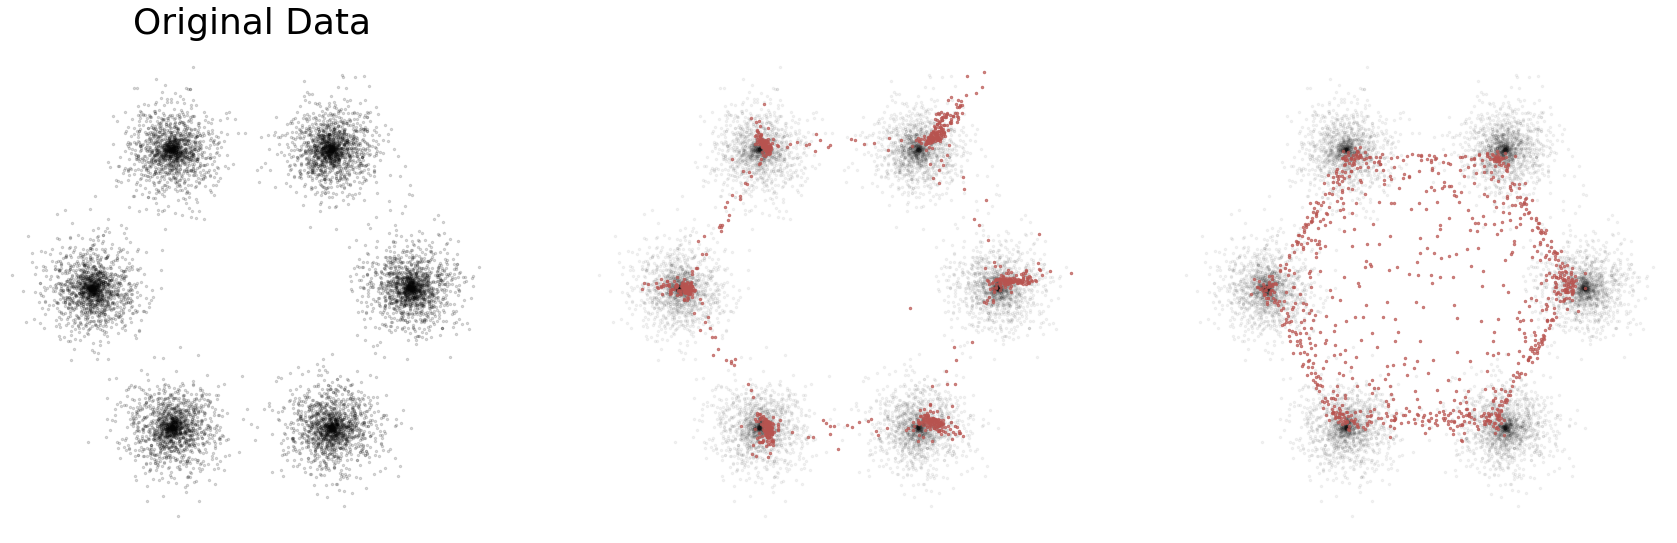

In [3]:
functions=[]

DM_val = load_data.all_val_wrapper()

#In this case, we include objectives specifically for ML efficacy
DM_objs = [load_data.KNO1_a_wrapper(4,4), load_data.KNO1_b_wrapper(4,4)] 

pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func = load_data.sample_circle_blobs_wrapper(10000, 0, 6, 1.3, 0.22) #6 Modes
rangearr = np.array([[-2,2], [-2,2]])
dataset_func = load_data.get_dataset_func(sampling_func, DM_val, rangearr)

functions.append([dataset_func, DM_val, DM_objs, rangearr, None, None])

reg_clf_params = None
config_params = [False, False, False, None, None, False]
train_params = [128, 1e-3, 1e-3, 1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["GAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)
methods["VAE"] = VAEs.VAE_wrapper([1000, 128, 1e-3, 4, .05, False])

metrics=pd.Series()
metrics["Nearest Dataset Sample"] = ["minimize", evaluation.gen_data_distance_wrapper("x", "min")]
metrics["Nearest Generated Sample"] = ["minimize", evaluation.data_gen_distance_wrapper("x", "min")]

#Rediscovery needs special handling in the utils file. 
#We pass in a special flag: "Rediscovery" to trigger this handling. See utils file for more info
metrics["Rediscovery"] = ["minimize", "Rediscovery", evaluation.data_gen_distance_wrapper("x", "min")]
holdout = 0.05 #If using rediscovery, we need to hold out a portion of the data during training

metrics["F1"] = ["maximize", evaluation.F_wrapper("x", 1)]
metrics["F10"] = ["maximize", evaluation.F_wrapper("x", 10)]
metrics["F0.1"] = ["maximize", evaluation.F_wrapper("x", 0.1)]
metrics["AUC-PR"] = ["maximize", evaluation.AUC_wrapper("x")]
metrics["MMD"] = ["minimize", evaluation.MMD_wrapper('x')]
metrics["ML Efficacy"] = ["maximize", evaluation.ML_efficacy_wrapper(KNeighborsRegressor(n_neighbors=5), r2_score)]

validity_status = 0 #whether we are considering constraints
obj_status = 0 #whether we are considering functional performance
conditional_status = 0 #whether we are considering conditioning
cond_dist=False #Whether conditional metrics are compared against conditional or marginal distribution

#fit and generate
timestr = utils.fit_and_generate(functions, methods, numinst, numanim, numgen, scaling, obj_status, conditional_status, holdout)
# or load pre-generated data, e.g.: timestr = "20230212-150132"
utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "red")

**Diversity**

Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


C:\Users\Lyle\AppData\Local\Temp\ipykernel_30576\2101402303.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()
C:\Users\Lyle\AppData\Local\Temp\ipykernel_30576\2101402303.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-001749/Models/GAN_Problem_0_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20231129-001749/Models/GAN_Problem_0_Instance_0_discriminator\assets


VAE Training::   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-001749/Models/VAE_Problem_0_Instance_0_encoder\assets
INFO:tensorflow:Assets written to: Results/20231129-001749/Models/VAE_Problem_0_Instance_0_decoder\assets
Calculating Gen-Gen Distance
Calculating Convex Hull
Calculating Data-Gen Distance
Calculating Distance to Centroid
Calculating Gen-Gen Distance
Calculating Convex Hull
Calculating Data-Gen Distance
Calculating Distance to Centroid


Problem 1 Scores:,GAN,VAE
Inter-Generated Sample,0.013966,0.033104
Convex Hull,6.853084,5.747329
DPP Diversity,14.774162,14.351611
Nearest Generated Sample,0.089383,0.094199
Distance to Centroid,1.388866,1.101779


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

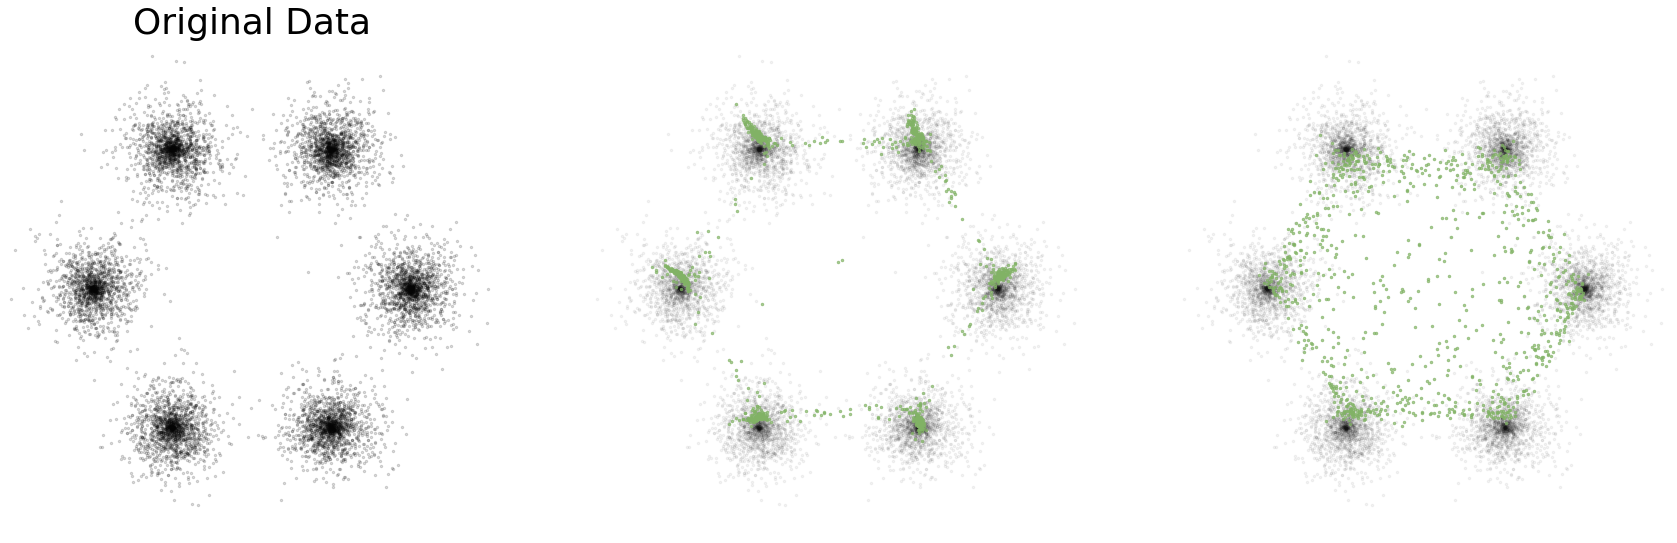

In [4]:
functions=[]

DM_val = load_data.all_val_wrapper()
pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func = load_data.sample_circle_blobs_wrapper(10000, 0, 6, 1.3, 0.22) #6 Modes
rangearr = np.array([[-2,2], [-2,2]])
dataset_func = load_data.get_dataset_func(sampling_func, DM_val, rangearr)

functions.append([dataset_func, DM_val, None, rangearr, None, None])

reg_clf_params = None
config_params = [False, False, False, None, None, False]
train_params = [128, 1e-3, 1e-3, 1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["GAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)
methods["VAE"] = VAEs.VAE_wrapper([1000, 128, 1e-3, 4, .05, False])


metrics=pd.Series()
metrics["Inter-Generated Sample"] = ["maximize", evaluation.gen_gen_distance_wrapper("x", "min")]
metrics["Convex Hull"] = ["maximize", evaluation.convex_hull_wrapper("x")]
metrics["DPP Diversity"] = ["minimize", evaluation.DPP_diversity_wrapper("x")]
metrics["Nearest Generated Sample"] = ["maximize", evaluation.data_gen_distance_wrapper("x", "min")]
metrics["Distance to Centroid"] = ["maximize", evaluation.distance_to_centroid_wrapper("x")]


validity_status = 0 #whether we are considering constraints
obj_status = 0 #whether we are considering functional performance
conditional_status = 0 #whether we are considering conditioning
cond_dist=False #Whether conditional metrics are compared against conditional or marginal distribution

timestr = utils.fit_and_generate(functions, methods, numinst, numanim, numgen, scaling, obj_status, conditional_status, holdout=0)

utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "green")

**Constraint Adherence**

Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


C:\Users\Lyle\AppData\Local\Temp\ipykernel_30576\1815594609.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()
C:\Users\Lyle\AppData\Local\Temp\ipykernel_30576\1815594609.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-004015/Models/GAN_Problem_0_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20231129-004015/Models/GAN_Problem_0_Instance_0_discriminator\assets


VAE Training::   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-004015/Models/VAE_Problem_0_Instance_0_encoder\assets
INFO:tensorflow:Assets written to: Results/20231129-004015/Models/VAE_Problem_0_Instance_0_decoder\assets
Calculating predicted_constraint_satisfaction
Calculating Gen-Neg Distance
Calculating predicted_constraint_satisfaction
Calculating Gen-Neg Distance


Problem 1 Scores:,GAN,VAE
Predicted Constraint Satisfaction,0.848400,0.660200
Validity,0.786000,0.557000
Nearest Invalid Sample,0.206137,0.158986


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

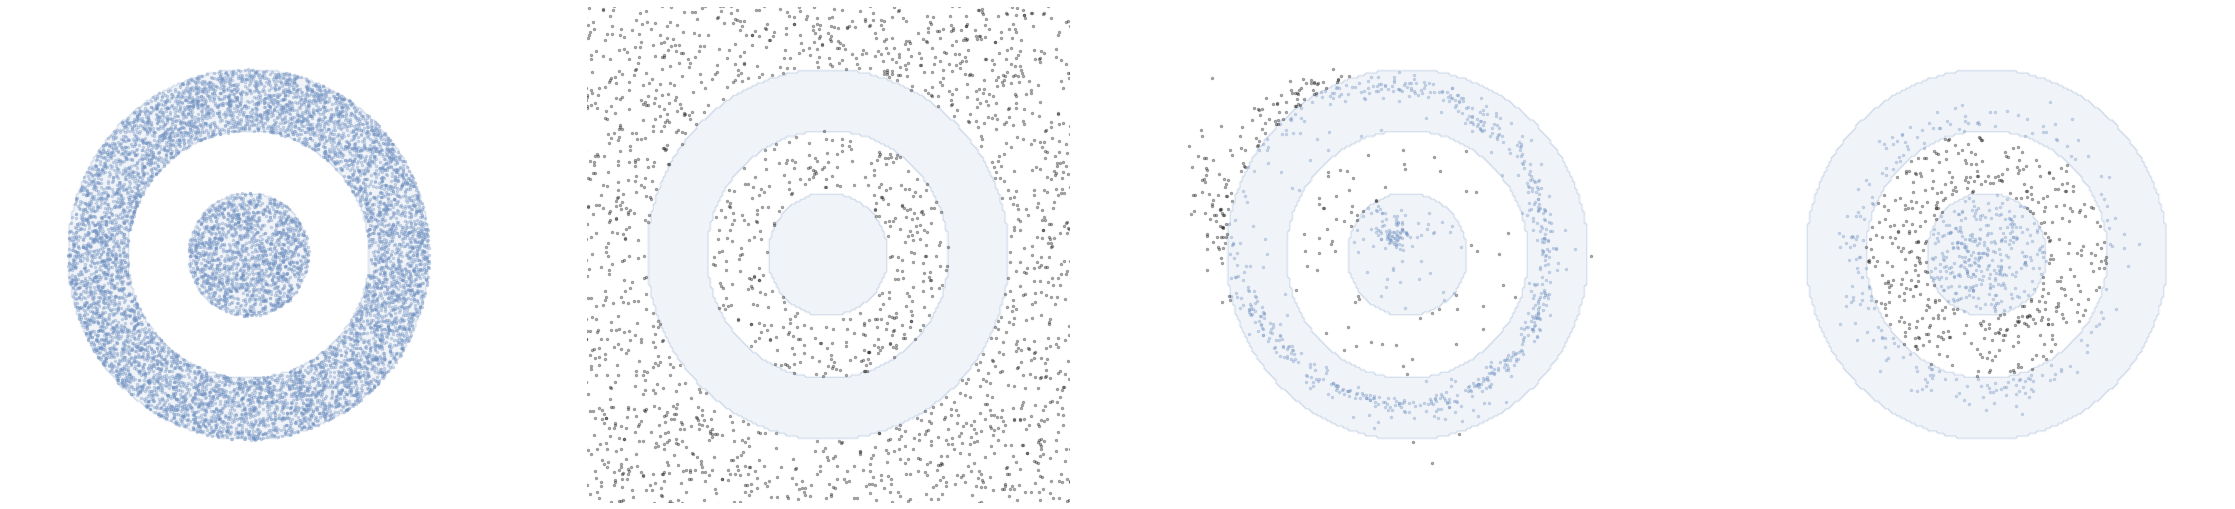

In [10]:
functions=[]

sampling_func_2 = load_data.sample_uniform_wrapper(10000, 10000) #Uniform Sampling with Number of positive samples & Negative Samples
validity_func_2 = load_data.concentric_circles_val_wrapper(2, 0.5)
rangearr_2 = np.array([[-1,1], [-1,1]])
dataset_func_2 = load_data.get_dataset_func(sampling_func_2, validity_func_2, rangearr)
functions.append([dataset_func_2, validity_func_2, None, rangearr_2, None, None])

reg_clf_params = None
config_params = [False, False, False, None, None, False]
train_params = [128, 1e-3, 1e-3, 1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["GAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)
methods["VAE"] = VAEs.VAE_wrapper([1000, 128, 1e-3, 4, .05, False])


metrics=pd.Series()
metrics["Predicted Constraint Satisfaction"] = ["maximize", evaluation.predicted_constraint_satisfaction_wrapper(KNeighborsClassifier(n_neighbors=5))]
metrics["Validity"] = ["maximize", "Validity"] #Validity is handled specially in utils
metrics["Nearest Invalid Sample"] = ["maximize", evaluation.gen_neg_distance_wrapper("min")]


validity_status = 1 #whether we are considering constraints
obj_status = 0 #whether we are considering functional performance
conditional_status = 0 #whether we are considering conditioning
cond_dist=False #Whether conditional metrics are compared against conditional or marginal distribution

timestr = utils.fit_and_generate(functions, methods, numinst, numanim, numgen, scaling, obj_status, conditional_status, holdout=0)

utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "blue")

**Performance and Target Achievement**

Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


C:\Users\Lyle\AppData\Local\Temp\ipykernel_30576\2046944337.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()
C:\Users\Lyle\AppData\Local\Temp\ipykernel_30576\2046944337.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-004113/Models/GAN_Problem_0_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20231129-004113/Models/GAN_Problem_0_Instance_0_discriminator\assets
No regressor provided! Fitting DNN Regressor using provided Parameters...
Epoch 1/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0498 - MSE: 0.0498 - val_loss: 0.0099 - val_MSE: 0.0099
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0149 - MSE: 0.0149 - val_loss: 0.0082 - val_MSE: 0.0082
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0131 - MSE: 0.0131 - val_loss: 0.0079 - val_MSE: 0.0079
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0125 - MSE: 0.0125 - val_loss: 0.0078 - val_MSE: 0.0078
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0117 - MSE: 0.0117 - val_loss: 0.0077 - val_MSE: 0.0077
Epoch 6/100
250/250 [====================

GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-004113/Models/MO-PaDGAN_Problem_0_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20231129-004113/Models/MO-PaDGAN_Problem_0_Instance_0_discriminator\assets
Calculating DTAI
Calculating Hypervolume
Calculating Generational Distance
Calculating Weighted Target Success Rate
Calculating DTAI
Calculating Hypervolume
Calculating Generational Distance
Calculating Weighted Target Success Rate


Problem 1 Scores:,GAN,MO-PaDGAN
DTAI,0.344874,0.328948
Hypervolume,0.498488,0.515972
Generational Distance,0.222726,0.212005
Weighted Target Success Rate,0.223000,0.196000
Signed Distance to Target,-0.257044,-0.278084


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

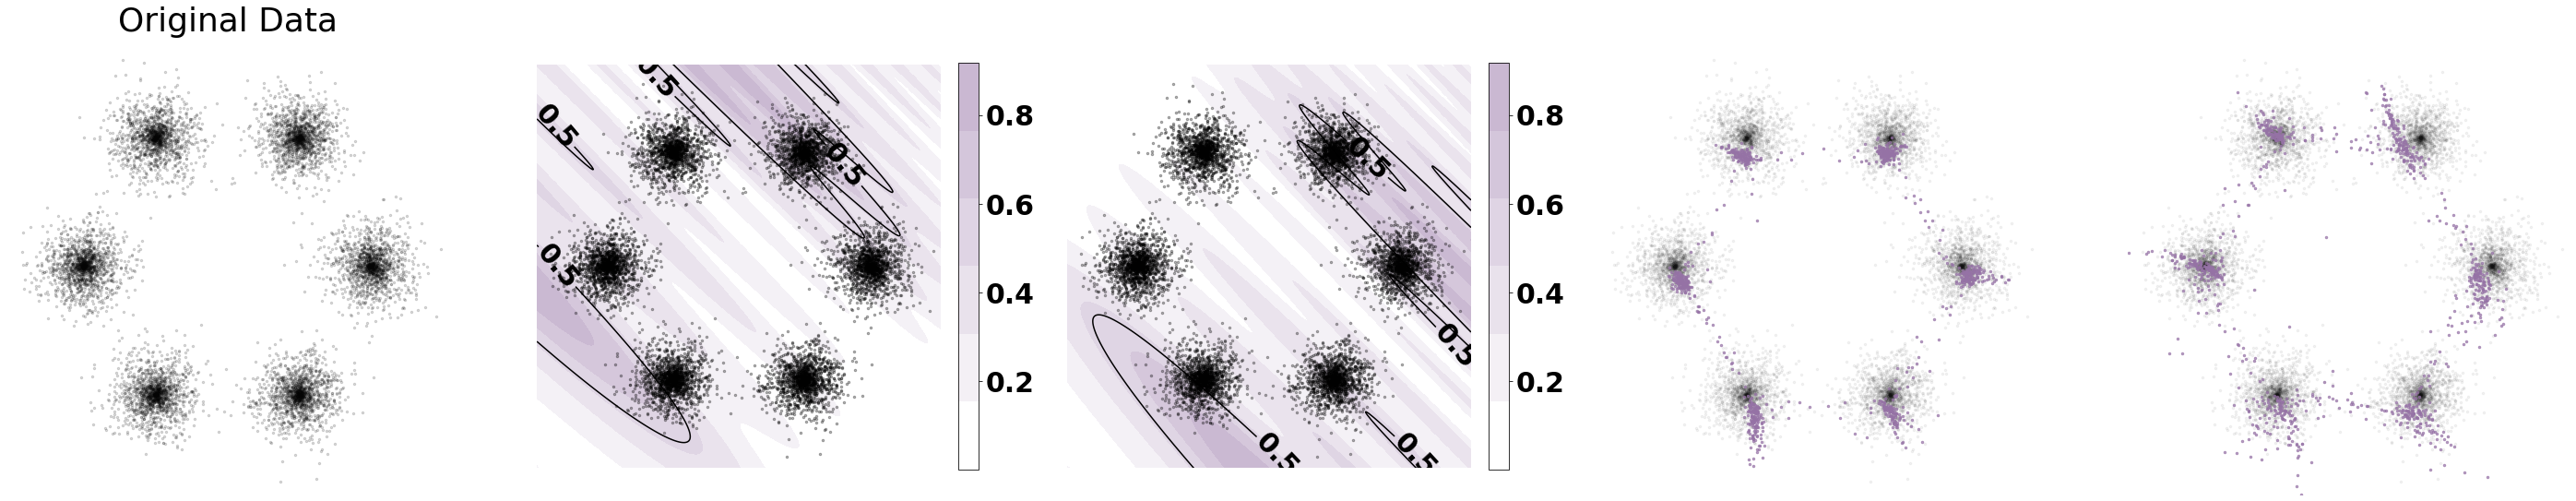

In [11]:
functions=[]

Perf_val = load_data.all_val_wrapper()
pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func = load_data.sample_circle_blobs_wrapper(10000, 0, 6, 1.3, 0.22) #6 Modes
Perf_objs = [load_data.KNO1_a_wrapper(4,4), load_data.KNO1_b_wrapper(4,4)] 
rangearr = np.array([[-2,2], [-2,2]])
dataset_func = load_data.get_dataset_func(sampling_func, DM_val, rangearr)
functions.append([dataset_func, Perf_val, Perf_objs, rangearr, None, None])

reg_clf_params = None
config_params = [False, False, False, None, None, False]
train_params = [128, 1e-3, 1e-3, 1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["GAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)

# Regressor/Classifier params: [dropout, layers, layersize, batchnorm, activation, patience, lr, batchsize, epochs]
reg_clf_params = [0.1, 2, 100, True, "Leaky ReLU", 30, 1e-4, 32, 100]
config_params = [False, False, False, "auto", "auto", False]
train_params = [128, 1e-3, 1e-3, 5, 2, 4, 5000]
DTAI_params= ["auto", "auto", "auto"]
methods["MO-PaDGAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)

metrics=pd.Series()
target = np.array([0.5, 0.5])
a_ = np.array([1, 1])
p_ = np.array([1, 1])
direction = "maximize" #Whether to maximize or minimize the objective function. Not to be confused with whether evaluation metrics are best maximized or minimized!
metrics["DTAI"] = ["maximize", evaluation.DTAI_wrapper(direction, target, a_, p_)]
metrics["Hypervolume"] = ["maximize", evaluation.Hypervolume_wrapper()]
metrics["Generational Distance"] = ["minimize", evaluation.Generational_distance_wrapper(pareto)]
metrics["Weighted Target Success Rate"] = ["maximize", evaluation.weighted_target_success_rate_wrapper(direction, target, p_)]
metrics["Signed Distance to Target"] = ["maximize", evaluation.signed_distance_to_boundary_wrapper(direction, target, a_)]


validity_status = 0 #whether we are considering constraints
obj_status = 1 #whether we are considering functional performance
conditional_status = 0 #whether we are considering conditioning
cond_dist=False #Whether conditional metrics are compared against conditional or marginal distribution
plotobjs = target

timestr = utils.fit_and_generate(functions, methods, numinst, numanim, numgen, scaling, obj_status, conditional_status, holdout=0)

utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "purple", plotobjs)

**Conditioning**

Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


C:\Users\Lyle\AppData\Local\Temp\ipykernel_30576\527179702.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()
C:\Users\Lyle\AppData\Local\Temp\ipykernel_30576\527179702.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-004432/Models/cGAN_Problem_0_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20231129-004432/Models/cGAN_Problem_0_Instance_0_discriminator\assets


VAE Training::   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-004432/Models/cVAE_Problem_0_Instance_0_encoder\assets
INFO:tensorflow:Assets written to: Results/20231129-004432/Models/cVAE_Problem_0_Instance_0_decoder\assets
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:00<00:00,  6.82it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating predicted_constraint_satisfaction
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:00<00:00,  5.92it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating predicted_constraint_satisfaction


Problem 1 Scores:,cGAN,cVAE
Nearest Dataset Sample,0.046376,0.179481
Nearest Generated Sample,0.021572,0.095702
F1,0.751981,0.350377
F10,0.916995,0.719490
F0.1,0.979261,0.844442
AUC-PR,0.828187,0.311062
MMD,0.016392,0.129822
Conditioning Reconstruction,0.013184,0.013833
Conditioning Adherence,0.014106,0.018309


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

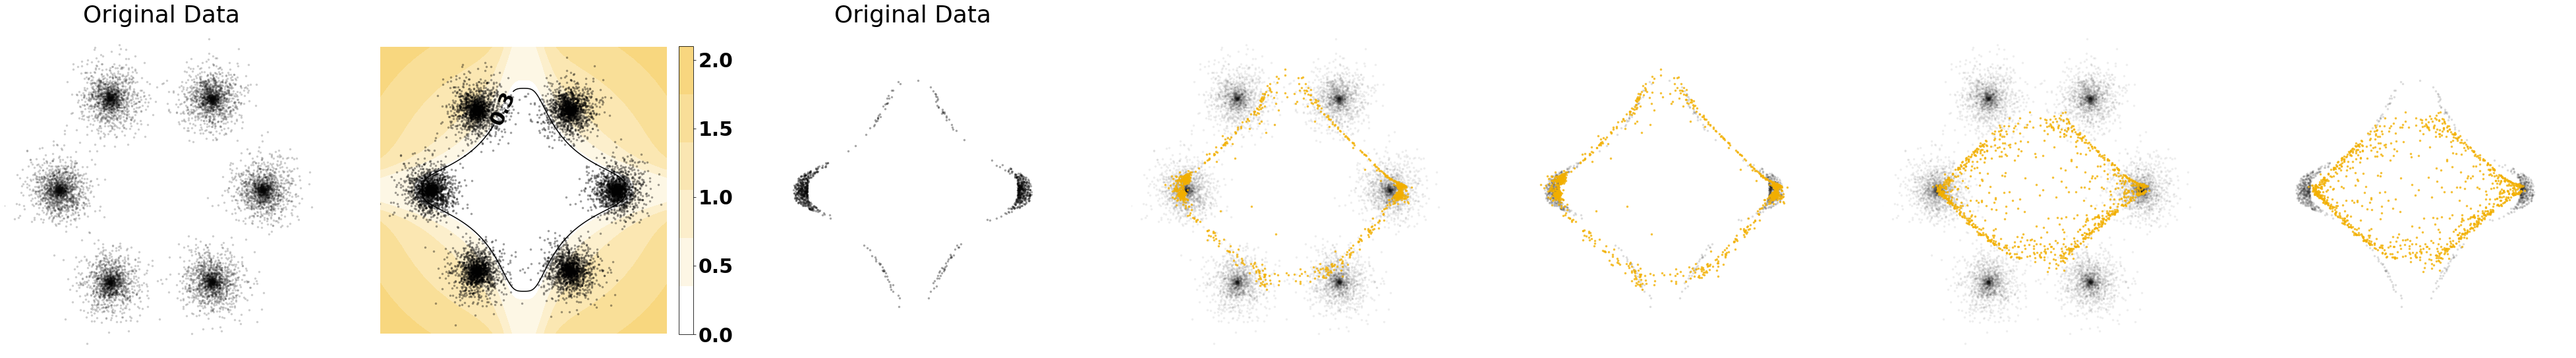

In [12]:
#Note: only single variable continuous conditioning is currently supported

functions=[]

DM_val = load_data.all_val_wrapper()
pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func = load_data.sample_circle_blobs_wrapper(10000, 0, 6, 1.3, 0.22) #6 Modes
rangearr = np.array([[-2,2], [-2,2]])
dataset_func = load_data.get_dataset_func(sampling_func, DM_val, rangearr)
cond_func = load_data.exp_obj_wrapper(1,1)
cond=0.3
functions.append([dataset_func, DM_val, None, rangearr, cond_func, cond])


reg_clf_params = None
config_params_cond = [False, False, False, None, None, True]
train_params = [128, 1e-3, 1e-3, 1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["cGAN"] = Padgan_variants.padgan_wrapper(config_params_cond, train_params, DTAI_params, reg_clf_params, reg_clf_params)
methods["cVAE"] = VAEs.VAE_wrapper([1000, 128, 1e-3, 4, .05, True])

metrics=pd.Series()
metrics["Nearest Dataset Sample"] = ["minimize", evaluation.gen_data_distance_wrapper("x", "min")]
metrics["Nearest Generated Sample"] = ["minimize", evaluation.data_gen_distance_wrapper("x", "min")]
metrics["F1"] = ["maximize", evaluation.F_wrapper("x", 1)]
metrics["F10"] = ["maximize", evaluation.F_wrapper("x", 10)]
metrics["F0.1"] = ["maximize", evaluation.F_wrapper("x", 0.1)]
metrics["AUC-PR"] = ["maximize", evaluation.AUC_wrapper("x")]
metrics["MMD"] = ["minimize", evaluation.MMD_wrapper('x')]

#Conditioning Reconstruction and Adherence needs special handling in the utils file. We pass in their respective flags as follows:
metrics["Conditioning Reconstruction"] = ["maximize", "Conditioning Reconstruction", evaluation.predicted_conditioning_wrapper(KNeighborsRegressor(n_neighbors=5), cond)]
metrics["Conditioning Adherence"] = ["maximize", "Conditioning Adherence"]

validity_status = 0 #whether we are considering constraints
obj_status = 0 #whether we are considering functional performance
conditional_status = 1 #whether we are considering conditioning
cond_dist=True #Whether conditional metrics are compared against conditional or marginal distribution


#Generate a new set of results
timestr = utils.fit_and_generate(functions, methods, numinst, numanim, numgen, scaling, obj_status, conditional_status, holdout=0)

#OR Load a set of results from a timestring:
# timestr= "20230204-161902"

plotobjs = [cond]

utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "orange", plotobjs)